# Exploratory Data Analysis - Red Wine Quality Dataset

This notebook presents an exploratory data analysis of the UCI Red Wine Quality dataset, focusing on understanding the distribution of features, the target variable, and relationships between variables.

## 1. Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

In [2]:
# Load the dataset
with open('data/raw/winequality-red.csv', 'r') as f:
    header_line = f.readline().strip()

header_clean = header_line.replace('""', '"').replace('"', '')
columns = [col.strip() for col in header_clean.split(';')]

df = pd.read_csv('data/raw/winequality-red.csv', sep=';', skiprows=1, names=columns)

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
df.head()

Dataset shape: (1599, 12)

Column names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Check for missing values
missing = df.isnull().sum()
print(f"Missing values per column:\n{missing}")
print(f"\nTotal missing values: {missing.sum()}")
assert missing.sum() == 0, "Dataset contains missing values"

Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Total missing values: 0


## 2. Feature Distributions

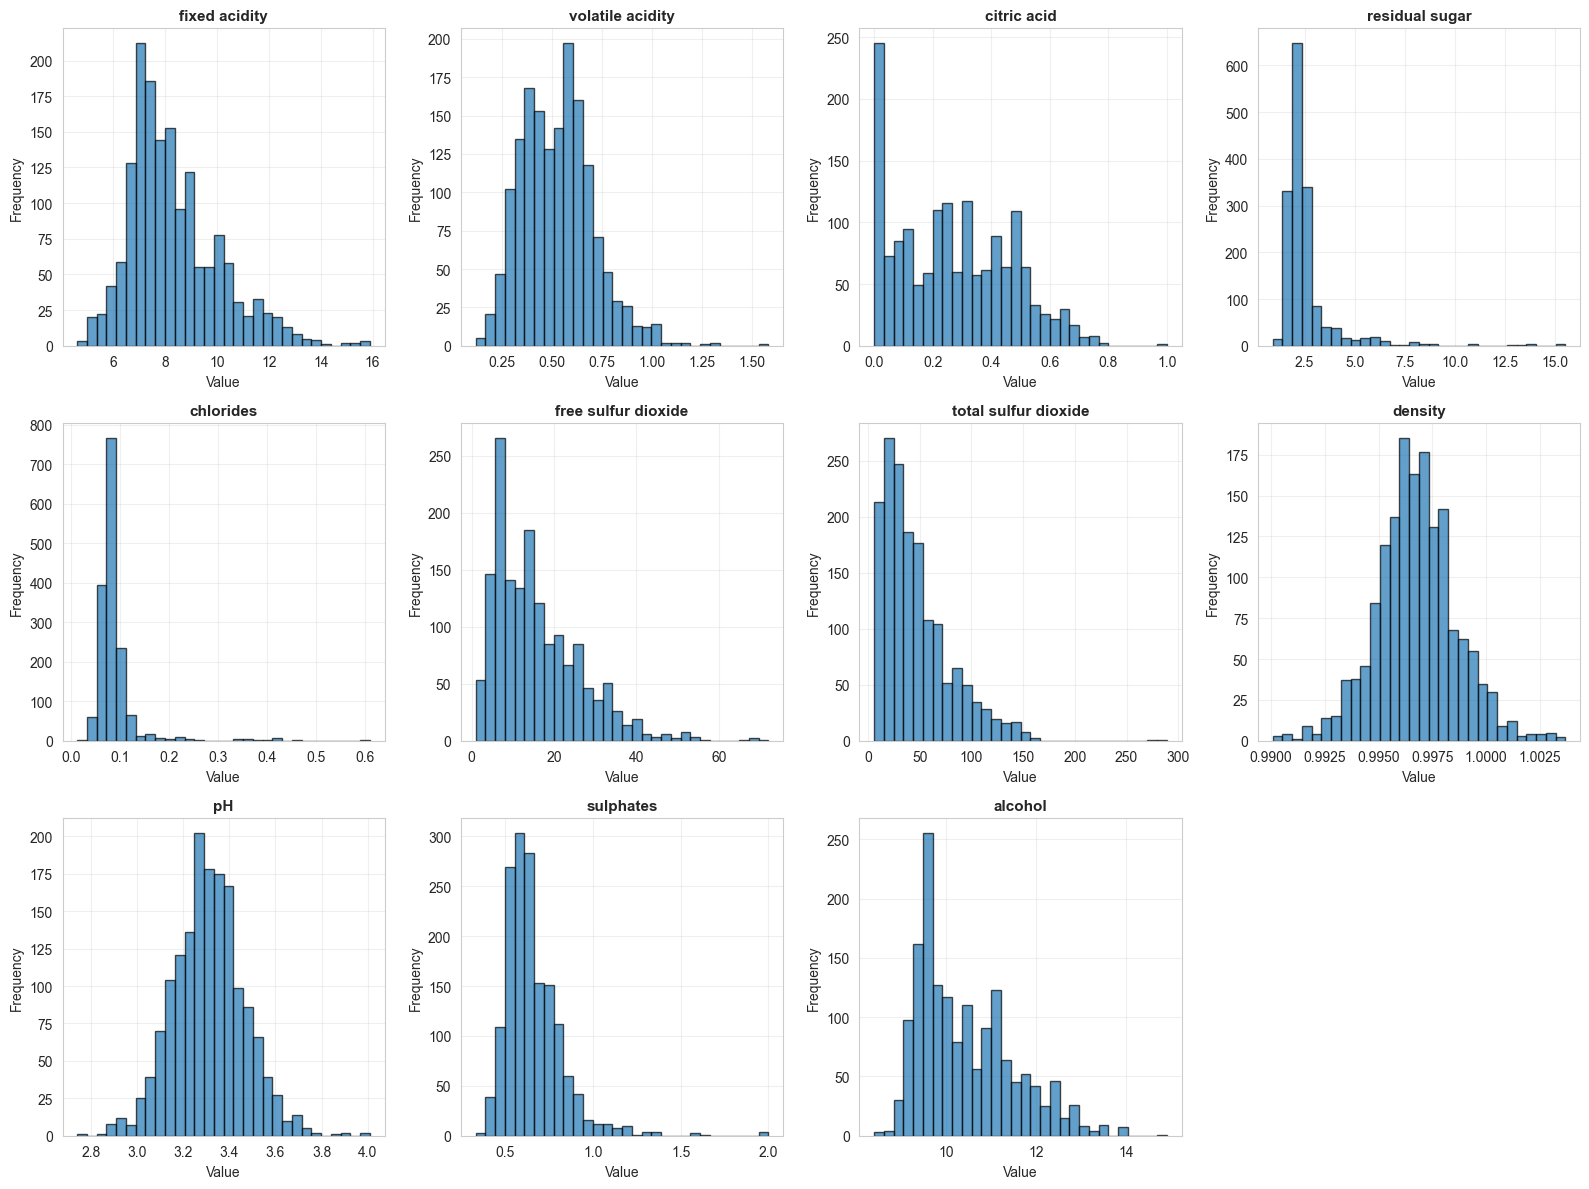

In [4]:
# Create feature distribution plots
feature_cols = df.columns[:-1]  # All columns except 'quality'

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[11])

plt.tight_layout()
plt.savefig('figures/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

The feature distribution plots reveal several important characteristics:
- Features exhibit dramatically different scales and units (e.g., density ranges from approximately 0.99 to 1.00 g/cm³, while free sulfur dioxide ranges from 1 to 72 mg/L)
- Only two features (density and pH) show approximately normal distributions; all remaining features exhibit right-skewed distributions
- The varying scales and distributions highlight the importance of feature normalization for machine learning algorithms

## 3. Target Variable Distribution

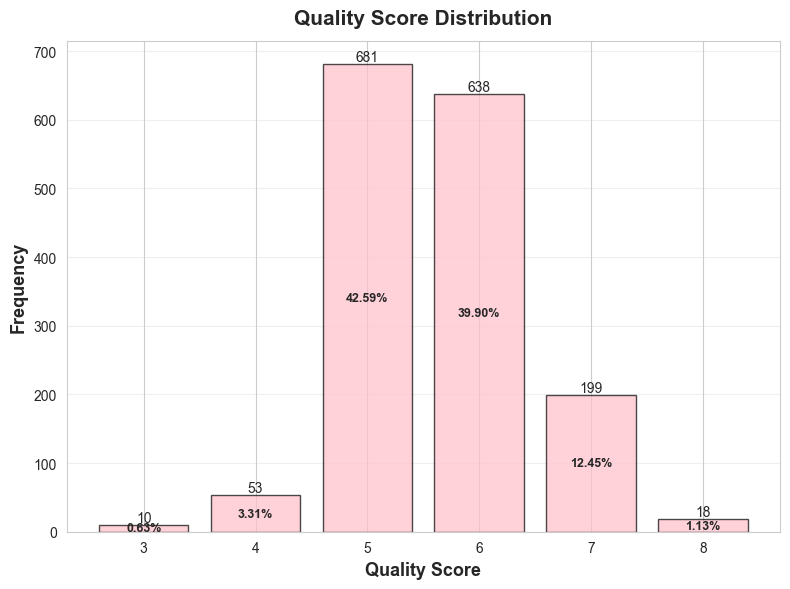


Quality distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Quality range: 3 to 8


In [5]:
# Quality distribution - standalone plot
quality_dist = df['quality'].value_counts().sort_index()
total_samples = len(df)

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(quality_dist.index, quality_dist.values, 
              color='pink', edgecolor='black', alpha=0.7)
ax.set_xlabel('Quality Score', fontsize=13, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=13, fontweight='bold')
ax.set_title('Quality Score Distribution', fontsize=15, fontweight='bold', pad=12)
ax.set_xticks(quality_dist.index)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels (count on top, percentage below)
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_samples) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=10)
    ax.text(bar.get_x() + bar.get_width()/2., height * 0.5,
            f'{percentage:.2f}%', ha='center', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('figures/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nQuality distribution:\n{quality_dist}")
print(f"\nQuality range: {df['quality'].min()} to {df['quality'].max()}")

## 4. Correlation Matrix

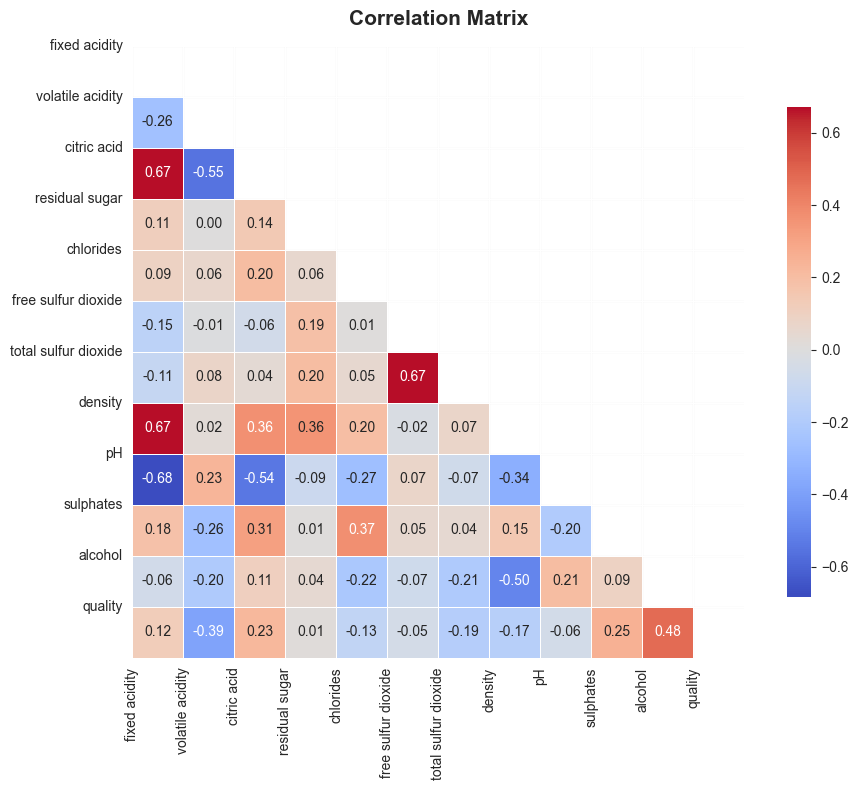

In [6]:
# Correlation matrix - standalone plot
correlation_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
                     center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix', fontsize=15, fontweight='bold', pad=15)
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, fontsize=10, rotation=90)
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_yticklabels(correlation_matrix.columns, fontsize=10, rotation=0)

plt.tight_layout()
plt.savefig('figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Feature correlations with quality
quality_corr = df.corr()['quality'].sort_values(ascending=False)
quality_corr = quality_corr.drop('quality')

print("Feature correlations with quality:")
print(quality_corr)

Feature correlations with quality:
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


## 5. Principal Component Analysis Visualization

The left panel shows the target variable distribution, revealing significant class imbalance. Quality levels 5 and 6 dominate the dataset, representing 42.59% and 39.90% of samples respectively, while quality levels 3 and 8 are extremely rare (0.63% and 0.19% respectively). The order of magnitude of these differences is substantial—quality level 5 is more than 68 times more frequent than quality level 3. This imbalance poses significant challenges for classification models, particularly for minority classes.

The right panel displays the feature distribution plots, which reveal several important characteristics. Features exhibit dramatically different scales and units: for example, density ranges from approximately 0.99 to 1.00 g/cm³, while free sulfur dioxide ranges from 1 to 72 mg/L. Only two features (density and pH) show approximately normal distributions; all remaining features exhibit right-skewed distributions. The varying scales and distributions highlight the importance of feature normalization for machine learning algorithms.

The correlation matrix (right panel) provides insights into pairwise linear relationships between features. Notable correlations include strong positive correlations between fixed acidity ↔ citric acid (0.67), fixed acidity ↔ density (0.67), and total sulfur dioxide ↔ free sulfur dioxide (0.67). Strong negative correlations are observed between fixed acidity ↔ pH (-0.68), citric acid ↔ volatile acidity (-0.55), and citric acid ↔ pH (-0.54). Regarding quality, alcohol shows the strongest positive correlation (0.48), followed by sulphates (0.25) and citric acid (0.23). Conversely, volatile acidity exhibits the strongest negative correlation (-0.39), indicating that higher levels are associated with lower quality scores.

Principal Component Analysis (PCA) is a dimensionality reduction technique that allows us to visualize high-dimensional data in a lower-dimensional space, providing a glimpse into the data structure. PCA is applied here exclusively for exploratory visualization to examine the data structure in reduced-dimensional space. This analysis helps assess whether linear separability exists between quality classes and provides insight into the intrinsic dimensionality of the feature space. The standardization applied here is solely for visualization purposes and does not represent any preprocessing step for model training.

In [8]:
# Prepare data for PCA (features only, standardized)
X = df.drop('quality', axis=1)
y = df['quality']

# Standardize features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for visualization (2D and 3D)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print(f"2D PCA explained variance ratio: {pca_2d.explained_variance_ratio_}")
print(f"2D PCA total explained variance: {pca_2d.explained_variance_ratio_.sum():.3f}")
print(f"\n3D PCA explained variance ratio: {pca_3d.explained_variance_ratio_}")
print(f"3D PCA total explained variance: {pca_3d.explained_variance_ratio_.sum():.3f}")

2D PCA explained variance ratio: [0.28173931 0.1750827 ]
2D PCA total explained variance: 0.457

3D PCA explained variance ratio: [0.28173931 0.1750827  0.1409585 ]
3D PCA total explained variance: 0.598


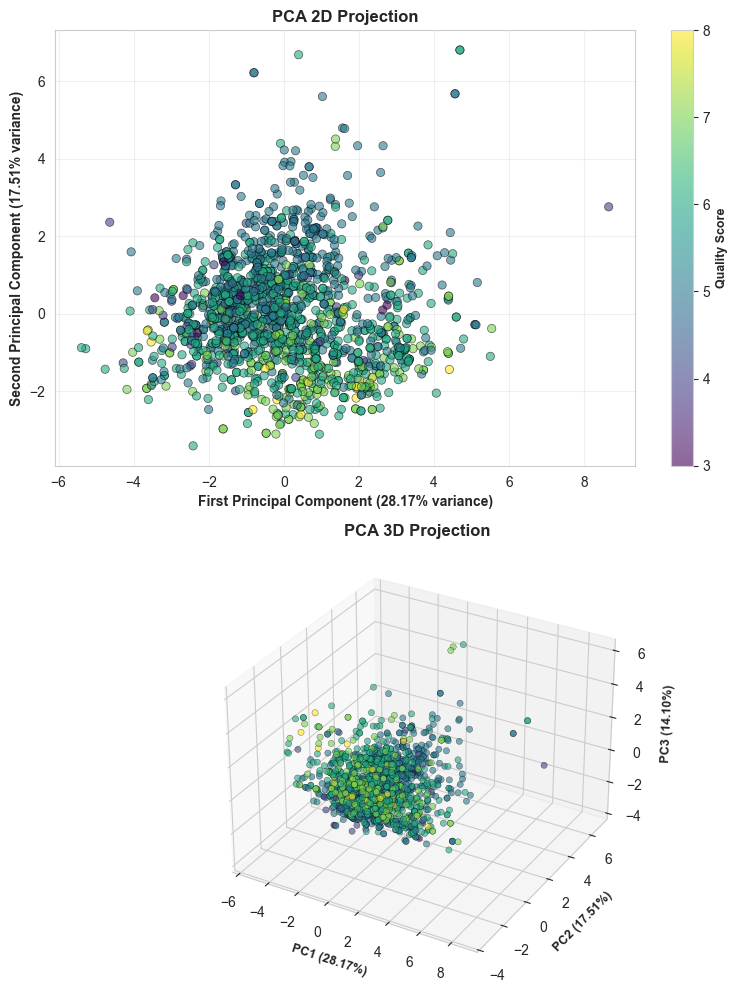

In [9]:
# Create 2D and 3D PCA visualizations (vertical layout)
fig = plt.figure(figsize=(8, 10))

# 2D PCA plot (top)
ax1 = fig.add_subplot(211)
scatter = ax1.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', 
                     alpha=0.6, edgecolors='black', linewidth=0.5)
ax1.set_xlabel(f'First Principal Component ({pca_2d.explained_variance_ratio_[0]:.2%} variance)', 
              fontsize=10, fontweight='bold')
ax1.set_ylabel(f'Second Principal Component ({pca_2d.explained_variance_ratio_[1]:.2%} variance)', 
              fontsize=10, fontweight='bold')
ax1.set_title('PCA 2D Projection', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Quality Score', fontsize=9, fontweight='bold')

# 3D PCA plot (bottom)
ax2 = fig.add_subplot(212, projection='3d')
scatter3d = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                       c=y, cmap='viridis', alpha=0.6, edgecolors='black', linewidth=0.3)
ax2.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})', fontsize=9, fontweight='bold')
ax2.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})', fontsize=9, fontweight='bold')
ax2.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})', fontsize=9, fontweight='bold')
ax2.set_title('PCA 3D Projection', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('figures/pca_visualization_2d_3d.png', dpi=300, bbox_inches='tight')
plt.show()

The PCA visualizations provide insights into the data structure:
- The 2D projection captures approximately 40-50% of the total variance
- The 3D projection captures approximately 55-65% of the total variance
- Quality classes show significant overlap in the reduced-dimensional space, indicating that linear separation may be challenging
- This suggests that non-linear classification methods may be necessary to effectively distinguish between quality classes

**Note**: These PCA visualizations are for exploratory purposes only.